#  NaiveBayes "by hand"

In [41]:
import nltk
import re
import string

import pandas as pd
from numpy import *
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
from sklearn.naive_bayes import GaussianNB

from sklearn.feature_extraction.text import CountVectorizer
from IPython.display import Image

data = pd.read_csv('SMSSpamCollection.csv',sep="\t", names=['tag','text'],header=None)
data.head()

,tag,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


####  Preprocessing

In [16]:
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer() 

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split(r'\s+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

data['text'] = data['text'].apply(lambda x: clean_text(x))
data.replace('ham', 0, inplace=True)
data.replace('spam', 1,inplace=True)
data.head(6)

,tag,text
0,0,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,"[ok, lar, joke, wif, u, oni]"
2,1,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"[nah, dont, think, goe, usf, live, around, tho..."
5,1,"[freemsg, hey, darl, 3, week, word, back, id, ..."


In [3]:
#overview data
print('pam and spam: \n', (data['tag']).value_counts())

pam and spam: 
 0    4825
1     747
Name: tag, dtype: int64


In [37]:
#split data
from sklearn.model_selection import train_test_split

X=data['text']
y=data['tag']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.5, random_state=42)
print([np.shape(X_train), np.shape(y_train)])
print([np.shape(X), np.shape(y)])

[(2786,), (2786,)]
[(5572,), (5572,)]


In [ ]:
#for test
#print(trainX[0])
#print(sum(trainX[0]))
#print(len(trainX[0]))
#print(len(trainX))
type(X[0])

#### Generate a vacabulary list (with unique words): get all the words in the dataset

In [5]:
# 1.创建一个词表

def createVocabList(dataSet):
    vocabSet = set()    #创建一个空集
    for document in dataSet:
        vocabSet = vocabSet | set(document)  #创建两个集合的并集
    return  list(vocabSet)

#### Check whether test words in uniqure vacabulary list: vectorization 

In [6]:
# 2.遍历查看该单词是否出现，出现该单词则将该单词置1

def setOfWords2Vec(vocabList, inputSet):
    returnVec = [0] * len(vocabList) #Vectorize
    for word in inputSet:
        if word in vocabList:
            returnVec[vocabList.index(word)] = 1    #索引位置
        else:
            print("the word: %s is not in my Vocabulary!" % word)
    return returnVec 

####  Define bayes training function and classify text

In [7]:
# 3.after Vectorization, define bayes training function

def trainNB1(trainX, trainy):
    numTrainDocs = len(trainX)
    numWords = len(trainX[0])   # total words number
    porb_spam = sum(trainy) / float(numTrainDocs)  # probability_spam = total number of spam email / total number of email 侮辱性文件的个数 / 文件总数 = 侮辱性文件出现的概率
    
    p0Num = np.ones(numWords)  #initialize
    p1Num = np.ones(numWords)

    p0Denom = 1.0  #initialize denominator
    p1Denom = 1.0
    
    for i in range(numTrainDocs):
        if trainy[i] == 1:
            p1Num += trainX[i] #calculate total number of words in spam emails in trainX 统计侮辱类别所有的文档中的词的数量
            p1Denom += sum(trainX[i])#total number spam words 侮辱类的总单词数量
        else:
            p0Num += trainX[i]
            p0Denom += sum(trainX[i])
        
    p1Vect = log(p1Num / p1Denom)  #对结果求对数，是为了防止下溢出 
    p0Vect = log(p0Num / p0Denom)
    
    return p0Vect,p1Vect,porb_spam

#p0Vec=p0Num/p0Demon是用向量除以词项的总和，我们可以理解成将这个向量标准化，归一化，便于后续的处理

# 4. classify

def classifyNB(vec2Classify,p0Vec,p1Vec,pClass1):
    p1=sum(vec2Classify*p1Vec)+log(pClass1)
    p0=sum(vec2Classify*p0Vec)+log(1-pClass1)
    if p1>p0:
        return 1
    else:
        return 0

In [10]:
def setOfWords2Vec(vocabList, inputSet):
    returnVec = [0] * len(vocabList) #Vectorize
    for word in inputSet:
        if word in vocabList:
            returnVec[vocabList.index(word)] = 1    #索引位置
            
#        else:
#            print("the word: %s is not in my Vocabulary!" % word)
    return returnVec 

In [11]:
vector = setOfWords2Vec(myVocabList_all,X_train[5])
return_vector = pd.DataFrame(vector).transpose()
return_vector

,0,1,2,3,4,5,6,7,8,9,...,8185,8186,8187,8188,8189,8190,8191,8192,8193,8194
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#####  NOTE : In terms of the cell below, I didn't use this def testingNB as there are some problems with the loop. ( I'll correct it later. )

In [35]:
def testingNB():
    listPosts,listClasses= X,y
    myVocabList=createVocabList(listPosts)
    trainMat=[]
    for postinDoc in listPosts:
        trainMat.append(setOfWords2Vec(myVocabList,postinDoc))
    p0V,p1V,pAb=trainNB1(trainMat,listClasses)
    testEntry= X_train[5]
    thisDoc=setOfWords2Vec(myVocabList,testEntry)
    print(testEntry,'classified as:',classifyNB(thisDoc,p0V,p1V,pAb))

####  Testing NB - result

In [30]:
listPosts,listClasses= X,y
myVocabList=createVocabList(listPosts)
trainMat=[]

#for postinDoc in listPosts:
trainMat.append(setOfWords2Vec(myVocabList,postinDoc))
p0V,p1V,pAb=trainNB1(trainMat,listClasses)
testEntry= X_train[5]
thisDoc=setOfWords2Vec(myVocabList,testEntry)
print(" ".join(X_train[5]),'classified as:',classifyNB(thisDoc,p0V,p1V,pAb))

freemsg hey darl 3 week word back id like fun still tb ok xxx std chg send £150 rcv classified as: 0


/Users/lixiran/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in log


#### Conclusions:
#####  1. As a result, the Bayes classifier return a judgment, in which we can tell whether the email is spam or not.
#####  2. I haven't find the solution of  running  the loop in order to print all the results and do the further cross-validation yet...

#  NaiveBayes sklearn

In [57]:
data = pd.read_csv("SMSSpamCollection.csv", names=['tag', 'text'], sep='\t')

In [58]:
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer() 

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split(r'\s+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [59]:
from sklearn.model_selection import train_test_split

X=data['text']
y=data['tag']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=123)

In [60]:
#Vectorize text

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train)

tfidf_train = tfidf_vect_fit.transform(X_train)
tfidf_test = tfidf_vect_fit.transform(X_test)

X_train_vect = pd.concat([pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([pd.DataFrame(tfidf_test.toarray())], axis=1)

#### Final evaluation of models

In [53]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

clf.fit(X_train_vect, y_train) 
clf_model = clf.fit(X_train_vect, y_train)
y_pred = clf_model.predict(X_test_vect)
precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred), 3)))

Precision: 0.551 / Recall: 0.901 / F1-Score: 0.684 / Accuracy: 0.886


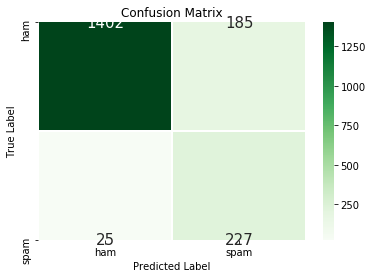

In [55]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
class_label = ["ham", "spam"]
df_cm = pd.DataFrame(cm, index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True,cmap=plt.cm.Greens, fmt='d',annot_kws={'size':15}, linewidths=0.3)


plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [56]:
#5-fold validation
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_test_vect, y_test, cv=5)

array([0.88043478, 0.89402174, 0.88586957, 0.88043478, 0.89918256])

#### Conclusion:
1. With sklearn Naive Bayes classifier, we can get the result easier as the algorithm has already been set up.
2. The final results are moderate, with recision only 0.551, while Recall is 0.901 and Accuracy is 0.886. There are several Bayes models in sklearn, different models could bring different accuracy.